## Análisis Exploratorio de Datos:

En este notebook se realiza un análisis de los datos contenidos en los dataframes de usuarios, reviews y juegos de Steam, a los fines de armar un sistema de recomendación de tipo filtro colaborativo a partir de descomposición UV:

In [7]:
# En primer lugar, se importan las librerías con las que vamos a trabajar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
sns.set()

In [9]:
# Se cargan los archivos con los que se trabajará:
df_games = pd.read_parquet('steam_games.parquet')
df_reviews = pd.read_parquet('user_reviews.parquet')
df_items = pd.read_parquet('user_items_extended.parquet')

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [7]:
# Se combina el df de user_reviews con el de juegos:
df_rev_games = pd.merge(df_reviews,df_games, on = "item_id", how="inner")

# Se combina el df de user_items con el de juegos:
df_items_games = pd.merge(df_items,df_games, on = "item_id", how="inner")

En primer lugar, se crea la columna **user_choice**, que determina la **preferencia del usuario por el juego**, al expresar un sentimiento positivo y recomendar el mismo:

In [11]:
# Se crea la columna "user_choice":
df_rev_games["user_choice"] = np.where((df_rev_games['sentiment_analysis'] == 2) & (df_rev_games['recommend'] == 1), 1, 0)
df_rev_games.head()

,user_id,item_id,recommend,posted_year,sentiment_analysis,app_name,title,price,developer,release_year,...,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,user_choice
0,76561197970982479,1250,1,2011,2,Killing Floor,Killing Floor,19.99,Tripwire Interactive,2009,...,0,0,0,0,0,0,0,0,0,1
1,death-hunter,1250,1,2015,2,Killing Floor,Killing Floor,19.99,Tripwire Interactive,2009,...,0,0,0,0,0,0,0,0,0,1
2,DJKamBer,1250,1,2013,0,Killing Floor,Killing Floor,19.99,Tripwire Interactive,2009,...,0,0,0,0,0,0,0,0,0,0
3,diego9031,1250,1,2015,1,Killing Floor,Killing Floor,19.99,Tripwire Interactive,2009,...,0,0,0,0,0,0,0,0,0,0
4,76561198081962345,1250,1,2014,1,Killing Floor,Killing Floor,19.99,Tripwire Interactive,2009,...,0,0,0,0,0,0,0,0,0,0


En primer lugar, se observa cuáles fueron los juegos preferidos (user_choice = 1) por los usuarios:

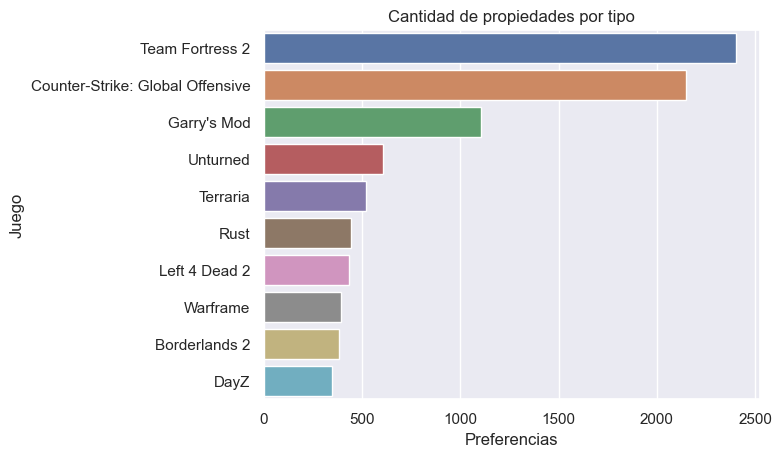

In [31]:
# Se calcula el top 10 de juegos preferidos por los usuarios:
user_recomm = df_rev_games.groupby("app_name")["user_choice"].sum().sort_values(ascending=False).head(10).reset_index()

# Visualizamos
sns.barplot(user_recomm, y = "app_name", x = "user_choice")
plt.xticks(rotation=0)
plt.ylabel('Juego')
plt.xlabel('Preferencias')
plt.title('Cantidad de propiedades por tipo')
plt.show()

Luego cuál es el top 10 en cantidad de usuarios:

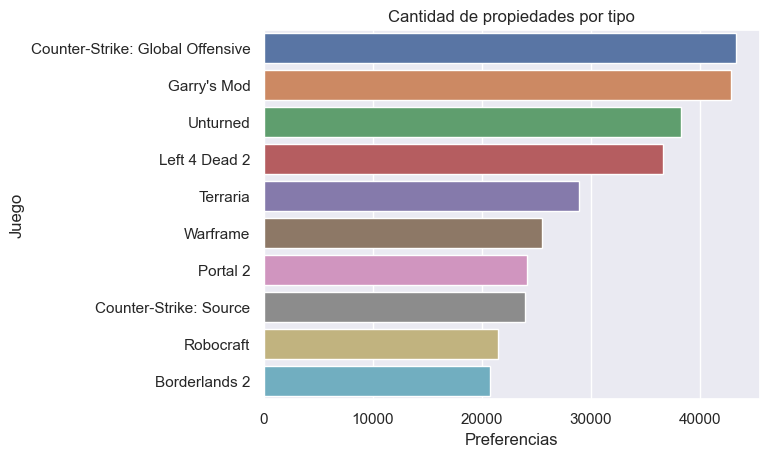

In [39]:
# Se calcula el top 10 de juegos preferidos por los usuarios:
total_users = df_items_games.groupby("app_name")["item_id"].count().sort_values(ascending=False).head(10).reset_index()

# Visualizamos
sns.barplot(total_users, y = "app_name", x = "item_id")
plt.xticks(rotation=0)
plt.ylabel('Juego')
plt.xlabel('Preferencias')
plt.title('Cantidad de propiedades por tipo')
plt.show()

In [36]:
total_users = df_items_games.groupby("app_name")["item_id"].count().sort_values(ascending=False).head(10).reset_index()
total_users

,app_name,item_id
0,Counter-Strike: Global Offensive,43332
1,Garry's Mod,42849
2,Unturned,38278
3,Left 4 Dead 2,36661
4,Terraria,28934
5,Warframe,25516
6,Portal 2,24206
7,Counter-Strike: Source,23952
8,Robocraft,21528
9,Borderlands 2,20789


In [ ]:
# Visualizamos
sns.barplot(user_recomm, y = "app_name", x = "user_choice")
plt.xticks(rotation=0)
plt.ylabel('Juego')
plt.xlabel('Preferencias')
plt.title('Cantidad de propiedades por tipo')
plt.show()